In [67]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-prediction-av/train_ctrUa4K.csv
/kaggle/input/loan-prediction-av/test_lAUu6dG.csv
/kaggle/input/loan-prediction-av/sample_submission_49d68Cx.csv


In [68]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [69]:
data_train = pd.read_csv('../input/loan-prediction-av/train_ctrUa4K.csv')
data_test = pd.read_csv('../input/loan-prediction-av/test_lAUu6dG.csv')

In [70]:
data_train.shape

(614, 13)

In [71]:
data_test.shape

(367, 12)

In [72]:
data_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [73]:
data_train.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [74]:
data_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [75]:
data_test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [76]:
data_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [77]:
data_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [78]:
data_train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [79]:
data_test['Gender'].value_counts()

Male      286
Female     70
Name: Gender, dtype: int64

In [80]:


def get_combined_data():
    train = pd.read_csv('../input/loan-prediction-av/train_ctrUa4K.csv')
    test = pd.read_csv('../input/loan-prediction-av/test_lAUu6dG.csv')
    
    targets = train.Loan_Status
    train.drop('Loan_Status', 1, inplace=True)
    combined = train.append(test)
    combined.reset_index(inplace=True)
    combined.drop(['index', 'Loan_ID'], inplace=True, axis=1)
    return combined



In [81]:
combined = get_combined_data()
combined.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [82]:
def impute_gender():
    global combined
    combined['Gender'].fillna('Male', inplace=True)

In [83]:
def impute_martial_status():
    global combined
    combined['Married'].fillna('Yes', inplace=True)

def impute_employment():
    global combined
    combined.loc[(combined.Self_Employed.isnull())&(combined.Credit_History==1),'Self_Employed'] ='No'
    combined.loc[(combined.Self_Employed.isnull()),'Self_Employed'] = 'Yes'

In [84]:
def impute_credit_history():
    global combined
    combined.loc[(combined.Credit_History.isnull()),'Credit_History'] = 2

In [85]:
def impute_loan_amount():
    global combined
    combined['LoanAmount'].fillna(combined['LoanAmount'].median(), inplace=True)






In [86]:
impute_gender()
impute_martial_status()
impute_employment()
impute_loan_amount()
impute_credit_history()

In [87]:
combined.isnull().sum()

Gender                0
Married               0
Dependents           25
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     20
Credit_History        0
Property_Area         0
dtype: int64

In [88]:
combined['Credit_History'].value_counts()


1.0    754
0.0    148
2.0     79
Name: Credit_History, dtype: int64

In [89]:
def process_gender():
    global combined
    combined['Gender'] = combined['Gender'].map({'Male':1,'Female':0})

In [90]:


def process_martial_status():
    global combined
    combined['Married'] = combined['Married'].map({'Yes':1,'No':0})



In [91]:
def process_dependents():
    global combined
    combined['Singleton'] = combined['Dependents'].map(lambda d: 1 if d=='1' else 0)
    combined['Small_Family'] = combined['Dependents'].map(lambda d: 1 if d=='2' else 0)
    combined['Large_Family'] = combined['Dependents'].map(lambda d: 1 if d=='3+' else 0)
    combined.drop(['Dependents'], axis=1, inplace=True)

In [92]:
def process_education():
    global combined
    combined['Education'] = combined['Education'].map({'Graduate':1,'Not Graduate':0})

In [93]:


def process_employment():
    global combined
    combined['Self_Employed'] = combined['Self_Employed'].map({'Yes':1,'No':0})



In [94]:


def process_income():
    global combined
    combined['Total_Income'] = combined['ApplicantIncome'] + combined['CoapplicantIncome']
    combined.drop(['ApplicantIncome','CoapplicantIncome'], axis=1, inplace=True)



In [95]:
def process_loan_amount():
    global combined
    combined['Debt_Income_Ratio'] = combined['Total_Income'] / combined['LoanAmount']

In [96]:
combined['Loan_Amount_Term'].value_counts()

360.0    823
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
36.0       3
60.0       3
12.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

<AxesSubplot:>

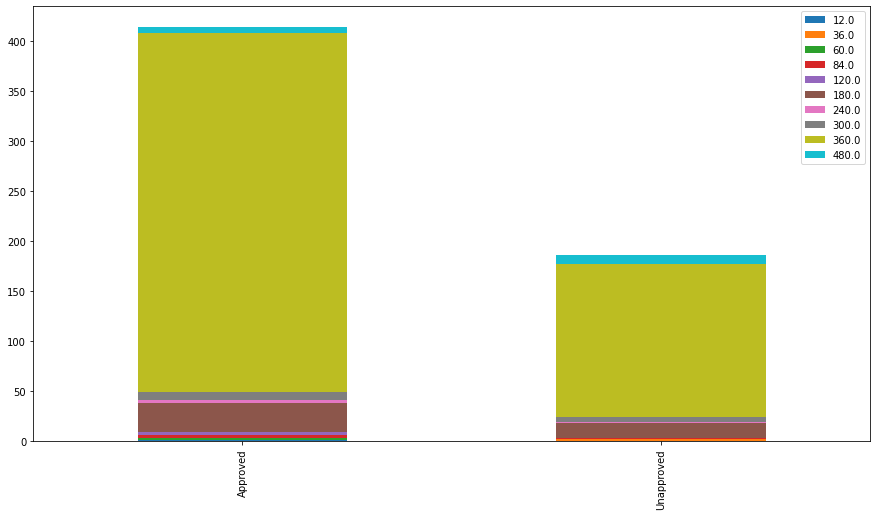

In [97]:
approved_term = data_train[data_train['Loan_Status']=='Y']['Loan_Amount_Term'].value_counts()
unapproved_term = data_train[data_train['Loan_Status']=='N']['Loan_Amount_Term'].value_counts()
df = pd.DataFrame([approved_term,unapproved_term])
df.index = ['Approved','Unapproved']
df.plot(kind='bar', stacked=True, figsize=(15,8))

In [98]:
def process_loan_term():
    global combined
    combined['Very_Short_Term'] = combined['Loan_Amount_Term'].map(lambda t: 1 if t<=60 else 0)
    combined['Short_Term'] = combined['Loan_Amount_Term'].map(lambda t: 1 if t>60 and t<180 else 0)
    combined['Long_Term'] = combined['Loan_Amount_Term'].map(lambda t: 1 if t>=180 and t<=300  else 0)
    combined['Very_Long_Term'] = combined['Loan_Amount_Term'].map(lambda t: 1 if t>300 else 0)
    combined.drop('Loan_Amount_Term', axis=1, inplace=True)

In [99]:
def process_credit_history():
    global combined
    combined['Credit_History_Bad'] = combined['Credit_History'].map(lambda c: 1 if c==0 else 0)
    combined['Credit_History_Good'] = combined['Credit_History'].map(lambda c: 1 if c==1 else 0)
    combined['Credit_History_Unknown'] = combined['Credit_History'].map(lambda c: 1 if c==2 else 0)
    combined.drop('Credit_History', axis=1, inplace=True)

In [100]:
def process_property():
    global combined
    combined["Property_Area"] = combined["Property_Area"].map({"Rural":0, "Semiurban":1, "Urban": 2,})

In [101]:
process_gender()
process_martial_status()
process_dependents()
process_education()
process_employment()
process_income()
process_loan_amount()
process_loan_term()
process_credit_history()
process_property()





In [102]:
combined[60:70]

,Gender,Married,Education,Self_Employed,LoanAmount,Property_Area,Singleton,Small_Family,Large_Family,Total_Income,Debt_Income_Ratio,Very_Short_Term,Short_Term,Long_Term,Very_Long_Term,Credit_History_Bad,Credit_History_Good,Credit_History_Unknown
60,1,1,1,0,120.0,2,0,0,0,6296.0,52.466667,0,0,0,1,0,1,0
61,1,1,1,0,99.0,2,0,0,1,3029.0,30.595960,0,0,0,1,0,1,0
62,1,1,0,1,165.0,0,0,0,0,6058.0,36.715152,0,0,1,0,1,0,0
63,1,1,1,0,126.0,0,1,0,0,4945.0,39.246032,0,0,0,1,1,0,0
64,0,0,1,0,116.0,1,0,0,0,4166.0,35.913793,0,0,0,1,1,0,0
65,1,1,1,0,258.0,1,0,0,0,10321.0,40.003876,0,0,0,1,0,1,0
66,1,0,0,0,126.0,2,0,0,0,5454.0,43.285714,0,0,1,0,1,0,0
67,1,1,1,0,312.0,2,1,0,0,10750.0,34.455128,0,0,0,1,0,1,0
68,1,1,0,1,125.0,2,0,0,1,7100.0,56.800000,1,0,0,0,0,1,0
69,0,0,1,0,136.0,1,0,0,0,4300.0,31.617647,0,0,0,1,1,0,0


In [103]:


def feature_scaling(df):
    df -= df.min()
    df /= df.max()
    return df



In [104]:
combined['LoanAmount'] = feature_scaling(combined['LoanAmount'])
combined['Total_Income'] = feature_scaling(combined['Total_Income'])
combined['Debt_Income_Ratio'] = feature_scaling(combined['Debt_Income_Ratio'])


In [105]:
combined.head()

,Gender,Married,Education,Self_Employed,LoanAmount,Property_Area,Singleton,Small_Family,Large_Family,Total_Income,Debt_Income_Ratio,Very_Short_Term,Short_Term,Long_Term,Very_Long_Term,Credit_History_Bad,Credit_History_Good,Credit_History_Unknown
0,1,0,1,0,0.169320,2,0,0,0,0.055394,0.071120,0,0,0,1,0,1,0
1,1,1,1,0,0.172214,0,1,0,0,0.058435,0.073382,0,0,0,1,0,1,0
2,1,1,1,1,0.082489,2,0,0,0,0.019583,0.069245,0,0,0,1,0,1,0
3,1,1,0,0,0.160637,2,0,0,0,0.043980,0.060939,0,0,0,1,0,1,0
4,1,0,1,0,0.191027,2,0,0,0,0.057292,0.063614,0,0,0,1,0,1,0


In [106]:


from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel



In [107]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, scoring=scoring)
    return np.mean(xval)

In [108]:
def recover_train_test_target():
    global combined, data_train
    targets = data_train['Loan_Status'].map({'Y':1,'N':0})
    train = combined.head(614)
    test = combined.iloc[614:]
    return train, test, targets

In [109]:


train, test, targets = recover_train_test_target()



In [110]:
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(train, targets)

In [111]:
features = pd.DataFrame()
features['Feature'] = train.columns
features['Importance'] = clf.feature_importances_
features.sort_values(by=['Importance'], ascending=False, inplace=True)
features.set_index('Feature', inplace=True)

<AxesSubplot:xlabel='Feature'>

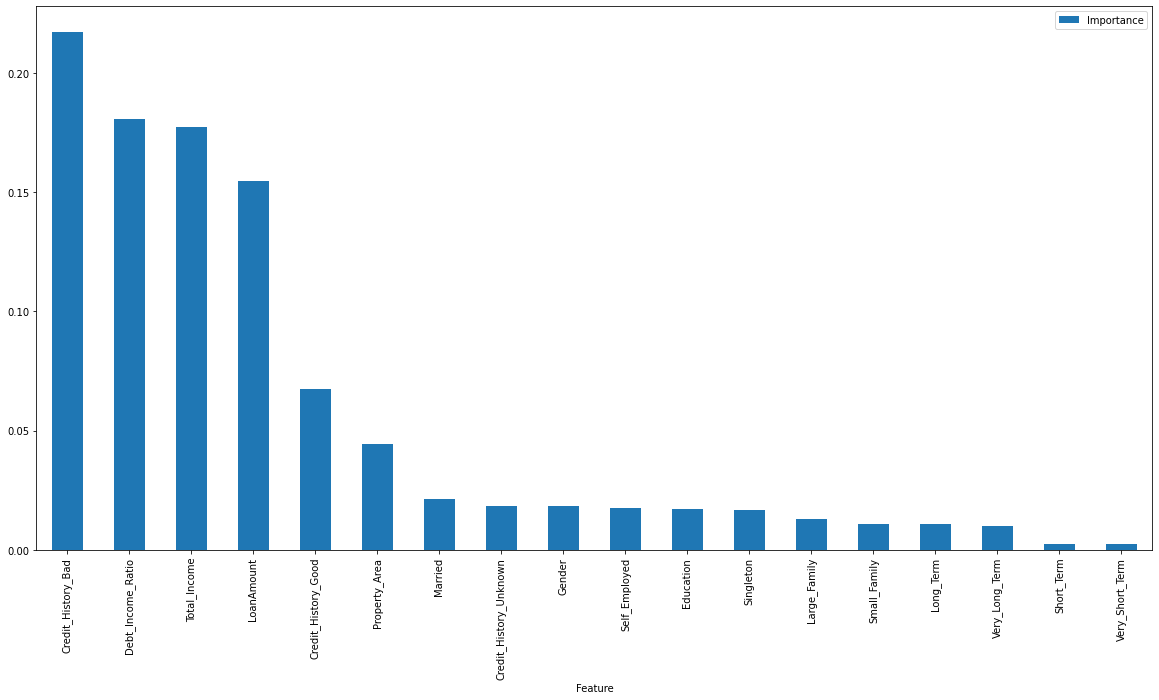

In [112]:
features.plot(kind='bar', figsize=(20, 10))

In [113]:


model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(train)
train_reduced.shape



(614, 5)

In [114]:
test_reduced = model.transform(test)
test_reduced.shape

(367, 5)

In [115]:


parameters = {'bootstrap': True,
              'min_samples_leaf': 5,
              'n_estimators': 120,
              'min_samples_split':8,
#               'max_features': 'sqrt',
              'max_depth': 4}

model = RandomForestClassifier(**parameters)
model.fit(train, targets)

compute_score(model, train, targets, scoring='accuracy')


0.8078235372517659

In [118]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train = sc.fit_transform(train)
test = sc.transform(test)

SVM Classifier

In [119]:


# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')
classifier.fit(train, targets)

# # Predicting the Test set results
# y_pred_svm = classifier.predict(X_test)

compute_score(classifier, train, targets, scoring='accuracy')

0.8062108489937359

In [121]:
from xgboost import XGBClassifier
param = {'n_estimators': 25,
              'max_depth': 2}

xgb_clf = XGBClassifier(**param)
xgb_clf.fit(train, targets)

compute_score(xgb_clf, train, targets, scoring='accuracy')


[18:13:27] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:13:27] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:13:27] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:13:27] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encode

0.8013194722111155

In [125]:
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn. preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
estimators = []


#Defining Support Vector Classifiers
model21 = SVC(kernel = 'rbf')
estimators.append(('svm1', model21))

model26 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
estimators.append(('knn1', model26))

model11 = LogisticRegression()
estimators.append(('logistic1', model11))
estimators.append(('logistic2', model11))

#Defining  Random forest
model31 = classifier
estimators.append(('rf1', model31))
estimators.append(('rf2', model31))

#Defining XG Boost
model41 =xgb_clf
estimators.append(('xgb1', model41))

# Defining the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(train, targets)
y_pred_ensemble = ensemble.predict(test)


[18:15:14] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [126]:
compute_score(ensemble, train_reduced, targets, scoring='accuracy')

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encode

[18:15:23] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:23] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:23] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:23] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.809462881514061

In [127]:
output = ensemble.predict(test).astype(int)
df_output = pd.DataFrame()
aux = pd.read_csv('../input/loan-prediction-av/test_lAUu6dG.csv')
df_output['Loan_ID'] = aux['Loan_ID']
df_output['Loan_Status'] = np.vectorize(lambda s: 'Y' if s==1 else 'N')(output)
df_output[['Loan_ID','Loan_Status']].to_csv('output.csv',index=False)

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
